In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("E:\study\Hoax-Detection-App\dataset\Dataset 1.csv",on_bad_lines='skip',sep = ";")
df2 = pd.read_csv("E:\study\Hoax-Detection-App\dataset\Dataset 2.csv",on_bad_lines='skip',sep = ";")
df4 = pd.read_csv("E:\study\Hoax-Detection-App\dataset\Dataset 4.csv",on_bad_lines='skip',sep = ",")
df4.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [3]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


In [8]:
#df rename columns 
df1_rename = df1.rename(columns={'tagging':'label','berita':'text'})
df1_rename['label'] = df1_rename['label'].str.lower()
df2_rename = df2.rename(columns={'kategori':'label','berita':'text'})
df2_rename['label'] = df2_rename['label'].str.lower()
df2_rename['text'] = df2_rename['text'].str[1:-1]
df4_rename = df4.rename(columns={'label':'label','narasi':'text'})
df_combine = pd.concat([df1_rename,df2_rename,df4_rename[['text','label']]],ignore_index=True)
df_combine_1_2 = pd.concat([df1_rename,df2_rename],ignore_index=True)
df_combine.head()

,text,label
0,"Jakarta, Di jejaring sosial, banyak beredar in...",valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,valid
3,Ikan lele merupakan salah satu makanan favorit...,valid
4,Ikan lele merupakan bahan makanan yang cukup p...,valid


In [10]:
#functions replave label valid wih 0 and hoax with 1
def label(x):
    if x == 'valid':
        return 0
    elif x == 'hoax':
        return 1
    else:
        return x

df_combine['label'] = df_combine['label'].apply(label)
df_combine_1_2['label'] = df_combine_1_2['label'].apply(label)

In [11]:
df_combine_1_2['label'].value_counts(normalize=True)

label
0    0.565455
1    0.434545
Name: proportion, dtype: float64

In [27]:
df_combine['label'].value_counts(normalize=True)

label
1    0.739636
0    0.260364
Name: proportion, dtype: float64

In [14]:
df_combine.to_csv('E:\study\Hoax-Detection-App\dataset\dataset_combine.csv',index=False)
df_combine_1_2.to_csv('E:\study\Hoax-Detection-App\dataset\dataset_combine_1_2.csv',index=False)

In [15]:
df_combine_1_2

,text,label
0,"Jakarta, Di jejaring sosial, banyak beredar in...",0
1,Isu bahwa ikan lele mengandung sel kanker di j...,0
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,0
3,Ikan lele merupakan salah satu makanan favorit...,0
4,Ikan lele merupakan bahan makanan yang cukup p...,0
...,...,...
1095,AA Gym : Lebih baik pilih pemimpin koruptor ta...,1
1096,Sebuah gambar dengan keterangan “Sultan Erdoga...,1
1097,"Restoran Padang ""Sederhana"" sedang merayakan u...",1
1098,Ini adalah binatang yang langka dan sangat ber...,1


<Axes: ylabel='Frequency'>

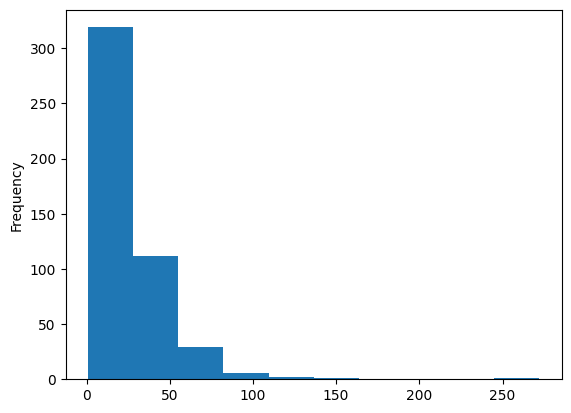

In [33]:
def calc_len(x):
    #delete whitespace and enter
    x = str(x).strip(" ")
    #calculate length each word
    x = x.split(" ")
    return len(x)

df1['length'] = df1['narasi'].apply(calc_len)
df1['length'].plot(kind = "hist")